# High-dimensional dynamical systems

#### by Joana Costa e Silva and Sándor Battaglini-Fischer

In [1]:
# imports
import scipy
import random
import os
import time

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from scipy.linalg import expm, qr
import scipy.linalg as la

## Model dynamics

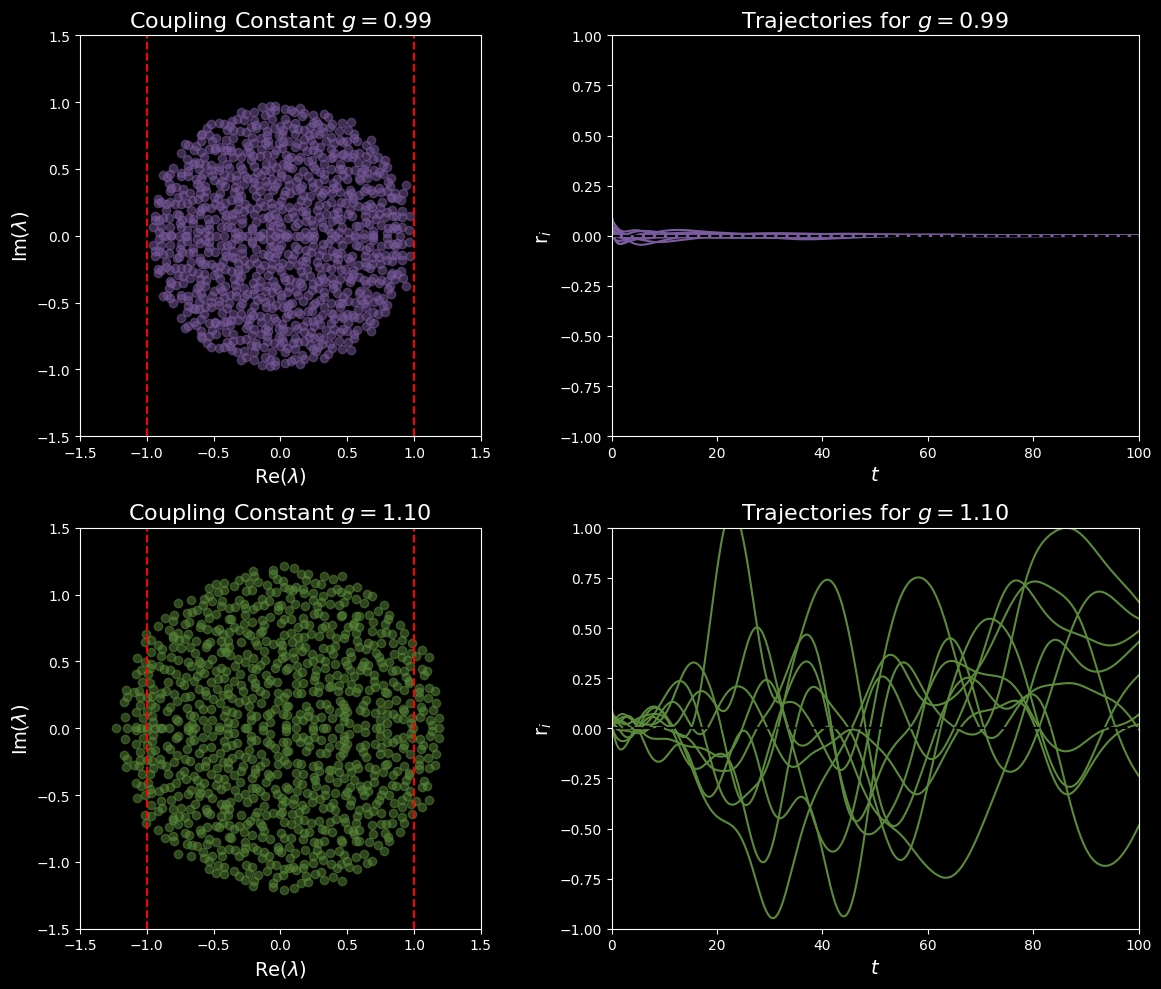

In [2]:
N = 1000
tau = 1.0
t = np.linspace(0, 500, 2000)

def phi(x):
    return np.tanh(x)

def network_dynamics(r, t, J, tau):
    return (-r + np.dot(J, phi(r))) / tau

def simulate_network(g):
    J = np.random.normal(0, g*g/np.sqrt(N), size=(N, N))
    np.fill_diagonal(J, 0)
    
    r0 = np.random.rand(N) * 0.1
    solution = odeint(network_dynamics, r0, t, args=(J, tau))
    
    return solution, J

def calculate_spectral_radius(J):
    eigenvalues = np.linalg.eigvals(J)
    return np.max(np.abs(eigenvalues))

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

colors = plt.cm.viridis(np.linspace(0, 1, 5))

g_values = [0.99, 1.1]

 
color_g_0_99 = '#7A5B9D'
color_g_1_5 = '#5B8A3A'

for i, g in enumerate(g_values):
    sol, J = simulate_network(g)
    spectral_radius = calculate_spectral_radius(J)
    
    eigenvalues = np.linalg.eigvals(J)
    color = color_g_0_99 if g == 0.99 else color_g_1_5
    axs[i, 0].scatter(eigenvalues.real, eigenvalues.imag, alpha=0.5, c=color)
    axs[i, 0].set_xlim(-1.5, 1.5)
    axs[i, 0].set_ylim(-1.5, 1.5)
    axs[i, 0].set_aspect('equal')
    axs[i, 0].set_title(r'$\text{Coupling Constant } g = %.2f$' % g, fontsize=16)
    axs[i, 0].set_xlabel(r'Re($\lambda$)', fontsize=14)
    axs[i, 0].set_ylabel(r'Im($\lambda$)', fontsize=14)
    
    axs[i, 0].axvline(x=1, color='red', linestyle='--', label='Spectral Radius = 1')
    axs[i, 0].axvline(x=-1, color='red', linestyle='--')

    for j in range(10):
        axs[i, 1].plot(t, sol[:, j], color=color)
    axs[i, 1].set_xlim(0, 100)
    axs[i, 1].set_ylim(-1, 1)
    axs[i, 1].set_title(r'$\text{Trajectories for} \ g = %.2f$' % g, fontsize=16)
    axs[i, 1].set_xlabel(r'$t$', fontsize=14)
    axs[i, 1].set_ylabel(r'r$_i$', fontsize=14)
    
    axs[i, 1].axhline(y=0, color='black', linestyle='--')
    

plt.tight_layout()
plt.show()


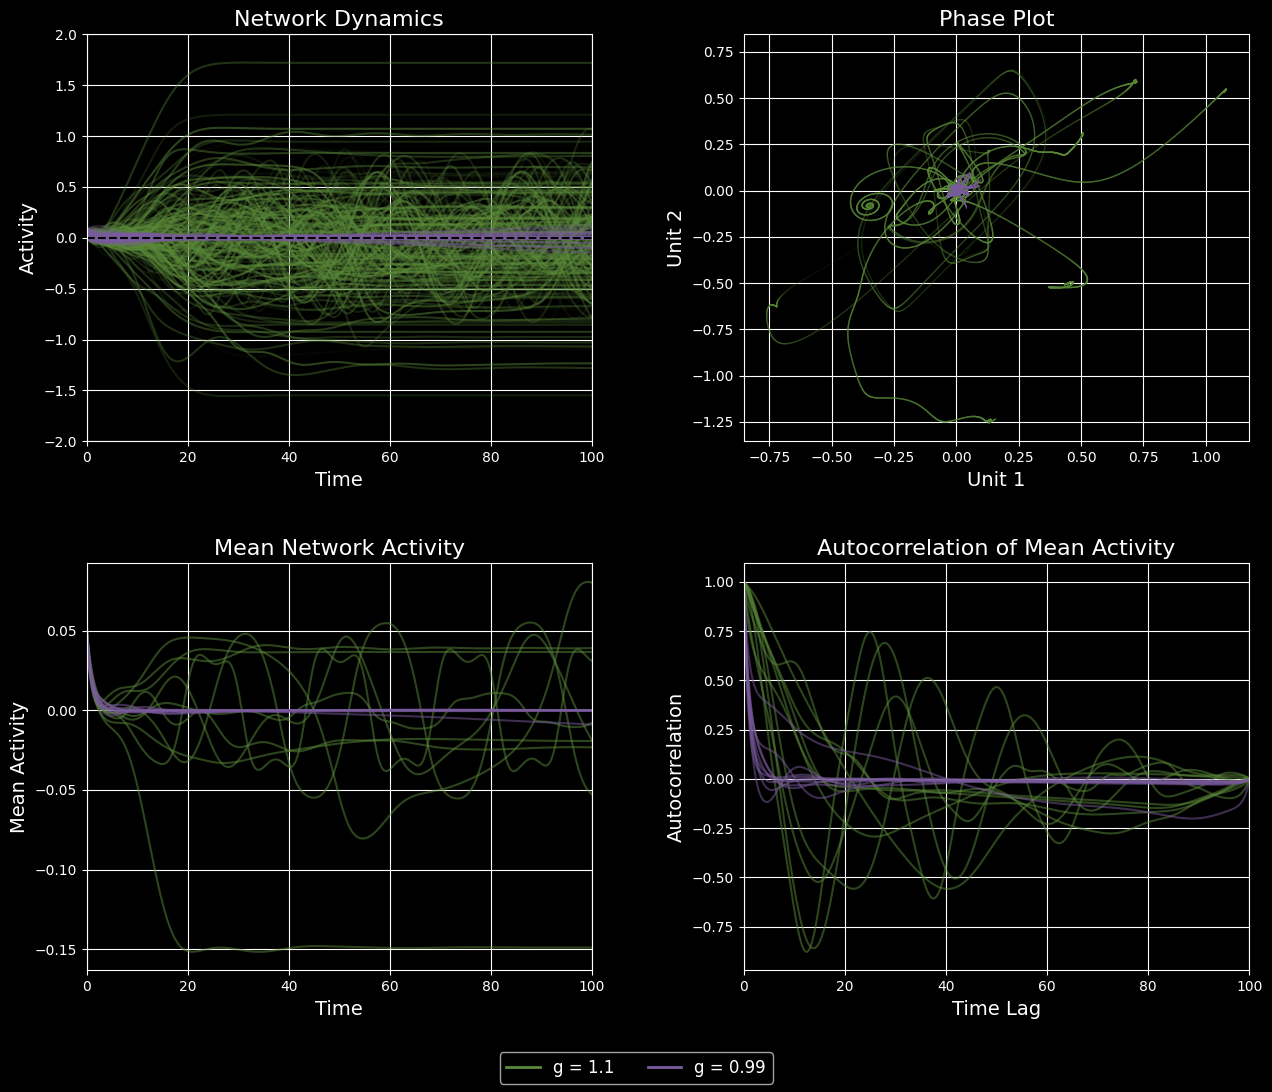

In [4]:
# Parameters
N = 100
tau = 1.0
t = np.linspace(0, 100, 2000)
g_values = [1.1, 0.99]  
num_simulations = 10

color_palette = ['#5B8A3A', '#7A5B9D']  

def phi(x):
    return np.tanh(x)

def network_dynamics(r, t, J, tau):
    return (-r + np.dot(J, phi(r))) / tau

fig, axs = plt.subplots(2, 2, figsize=(15, 12))
plt.subplots_adjust(bottom=0.1, hspace=0.3, wspace=0.3)

for g_idx, g in enumerate(g_values):
    color = color_palette[g_idx]
    
    for sim in range(num_simulations):
        J = np.random.normal(0, g*g/np.sqrt(N), size=(N, N))
        np.fill_diagonal(J, 0)
        r0 = np.random.rand(N) * 0.1
        sol = odeint(network_dynamics, r0, t, args=(J, tau))

        trajectories = 20
        # Time series plot
        for i in range(trajectories):
            axs[0, 0].plot(t, sol[:, i], color=color, alpha=(1 - i / trajectories) * 0.5)
        
        # Phase plot with direction and units
        for i in range(len(sol) - 1):
            axs[0, 1].plot(sol[i:i+2, 0], sol[i:i+2, 1], color=color, alpha=(1 - i / len(sol)) * 0.5, linewidth=1)
        
        # Mean activity plot
        mean_activity = np.mean(sol, axis=1)
        axs[1, 0].plot(t, mean_activity, color=color, alpha=0.5)

        # Autocorrelation plot
        autocorr = np.correlate(mean_activity - np.mean(mean_activity), 
                                mean_activity - np.mean(mean_activity), mode='full')
        autocorr = autocorr[len(autocorr)//2:]
        autocorr /= autocorr[0]
        axs[1, 1].plot(t[:len(autocorr)], autocorr, color=color, alpha=0.5)


axs[0, 0].set_xlabel(r'Time', fontsize=14)
axs[0, 0].set_ylabel(r'Activity', fontsize=14)
axs[0, 0].set_title(r'Network Dynamics', fontsize=16)
axs[0, 0].axhline(y=0, color='black', linestyle='--')
axs[0, 0].grid(True)
axs[0, 0].set_ylim(-2, 2)
axs[0, 0].set_xlim(0, 100)

axs[0, 1].set_xlabel(r'Unit 1', fontsize=14)
axs[0, 1].set_ylabel(r'Unit 2', fontsize=14)
axs[0, 1].set_title(r'Phase Plot', fontsize=16)
axs[0, 1].grid(True)

axs[1, 0].set_xlabel(r'Time', fontsize=14)
axs[1, 0].set_ylabel(r'Mean Activity', fontsize=14)
axs[1, 0].set_title(r'Mean Network Activity', fontsize=16)
axs[1, 0].set_xlim(0, 100)
axs[1, 0].grid(True)

axs[1, 1].set_xlabel(r'Time Lag', fontsize=14)
axs[1, 1].set_ylabel(r'Autocorrelation', fontsize=14)
axs[1, 1].set_title(r'Autocorrelation of Mean Activity', fontsize=16)
axs[1, 1].set_xlim(0, 100)
axs[1, 1].grid(True)

legend_elements = [plt.Line2D([0], [0], color=color_palette[0], lw=2, label=f'g = {g_values[0]}'),
                   plt.Line2D([0], [0], color=color_palette[1], lw=2, label=f'g = {g_values[1]}')]
fig.legend(handles=legend_elements, loc='lower center', ncol=2, fontsize=12)

plt.show()

## Wigner's semicircle distribution

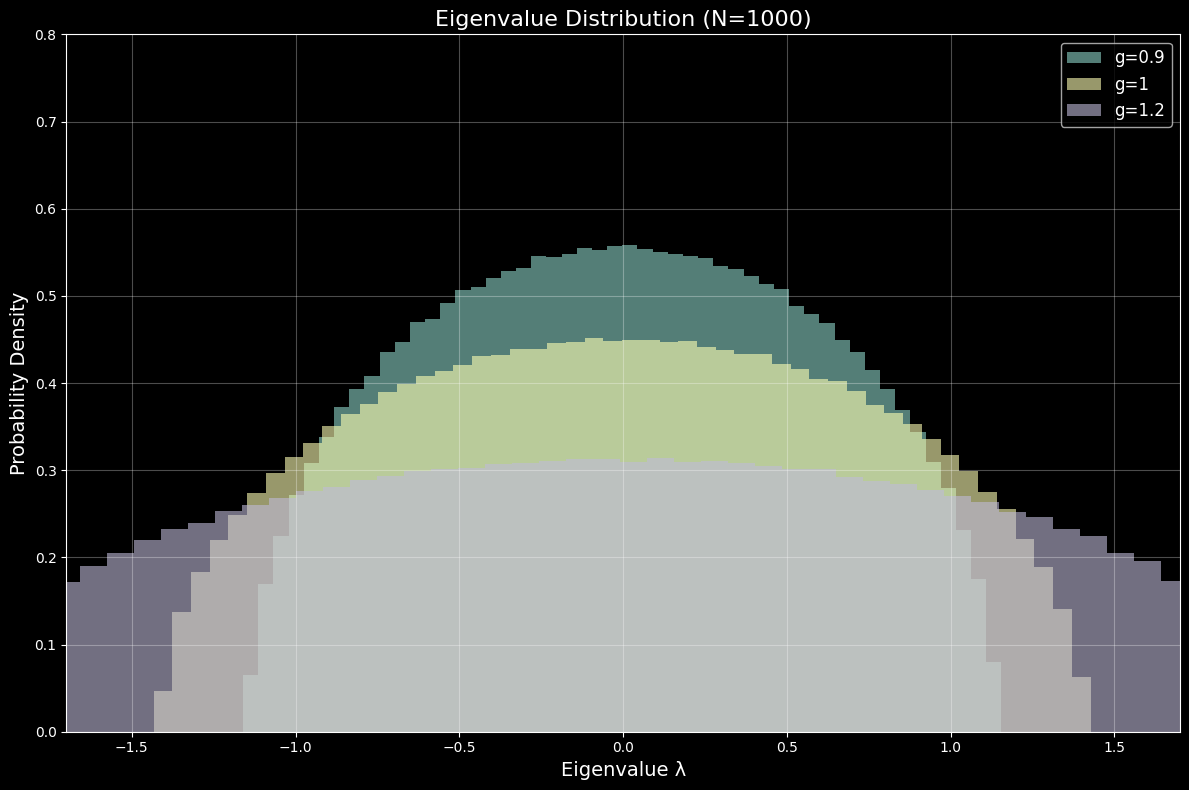

In [2]:
def wigner_semicircle(x, R):
    return (2 / (np.pi * R**2)) * np.sqrt(R**2 - x**2)

N = 1000  
g_values = [0.9, 1, 1.2] 
num_matrices = 100 

plt.figure(figsize=(12, 8))

for g in g_values:
    all_eigenvalues = []
    for _ in range(num_matrices):
        J = np.random.normal(0, (g*g)/np.sqrt(N), (N, N))
        J = (J + J.T) / 2  
        
        eigenvalues = np.linalg.eigvals(J)
        all_eigenvalues.extend(eigenvalues.real)

    # Theoretical distribution
    R = g
    x_theory = np.linspace(-R, R, 1000)
    y_theory = wigner_semicircle(x_theory, R)

    hist, bin_edges, _ = plt.hist(all_eigenvalues, bins=50, density=True, alpha=0.6, label=f'g={g}')

    # Plot theoretical distribution
    # plt.plot(x_theory, y_theory, linewidth=2)

plt.title(f"Eigenvalue Distribution (N={N})", fontsize=16)
plt.xlabel("Eigenvalue λ", fontsize=14)
plt.ylabel("Probability Density", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(-max(g_values)-0.5, max(g_values)+0.5)
plt.ylim(0, 0.8) 
# plt.gca().set_aspect('equal', adjustable='box') 

plt.tight_layout()
plt.show()

## Lyapunov spectrum, entropy rate and attractor dimension


Calculating for N = 100

Calculating for N = 200


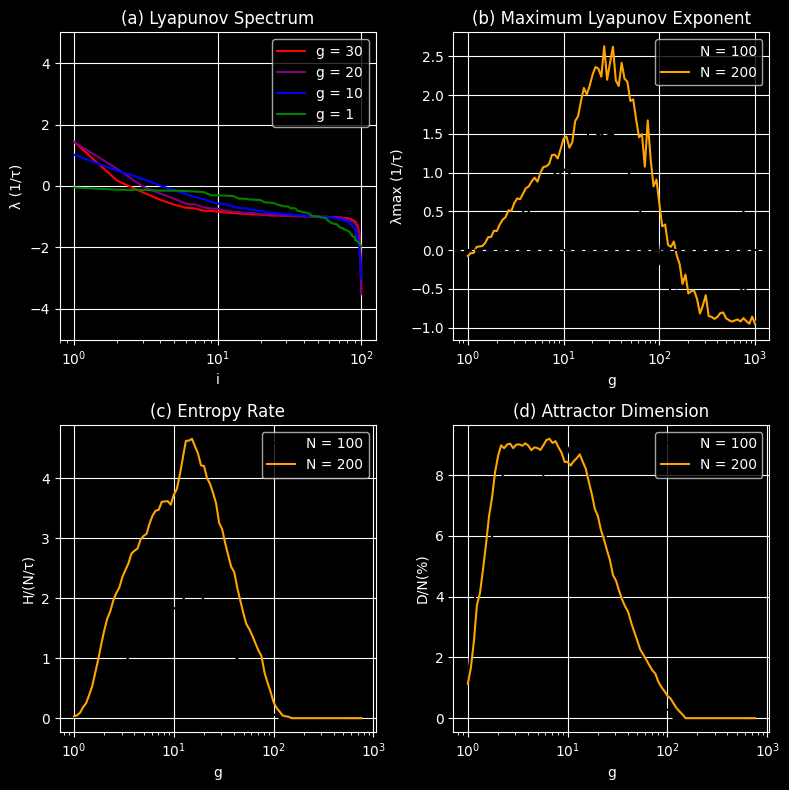

In [5]:

def phi(x):
    return np.tanh(x)

def network_dynamics(t, r, J):
    return -r + np.dot(J, phi(r))

def calculate_lyapunov_spectrum(g, N, t_sim, dt):
    J = np.random.normal(0, g*g/np.sqrt(N), size=(N, N))
    np.fill_diagonal(J, 0)
    
    t_eval = np.arange(0, t_sim, dt)
    r0 = np.random.randn(N) * 0.1
    
    def jacobian(r):
        return -np.eye(N) + J * (1 - phi(r)**2)
    
    sol = solve_ivp(network_dynamics, [0, t_sim], r0, args=(J,), t_eval=t_eval, method='RK45')
    
    trajectory = sol.y.T
    
    Q = np.eye(N)
    lyap = np.zeros(N)
    
    for i in range(1, len(t_eval)):
        J_t = jacobian(trajectory[i])
        
        try:
            Q_new = expm(J_t * dt) @ Q
        except OverflowError:
            print(f"Overflow encountered in matrix exponential at step {i}, g = {g}.")
            break
        
        Q, R = qr(Q_new)
        lyap += np.log(np.abs(np.diag(R)))
    
    lyap /= t_sim
    return np.sort(lyap)[::-1]

# Simulation parameters
t_sim = 200 
dt = 0.05   
g_values = np.logspace(0, 3, 100)

N_values = [100, 200]

lyap_spectra_all = {N: [] for N in N_values}
entropy_rates_all = {N: [] for N in N_values}
attractor_dims_all = {N: [] for N in N_values}

for N in N_values:
    print(f"\nCalculating for N = {N}")
    for g in g_values:
        lyap = calculate_lyapunov_spectrum(g, N, t_sim, dt)
        lyap_spectra_all[N].append(lyap)
        
        positive_lyap = lyap[lyap > 0]
        entropy_rates_all[N].append(np.sum(positive_lyap))
        
        k = np.argmax(np.cumsum(lyap) < 0)
        attractor_dims_all[N].append(k + np.sum(lyap[:k]) / np.abs(lyap[k]))

plt.figure(figsize=(8, 8))

# Plot (a) Lyapunov spectrum for different g
plt.subplot(221)
g_values_a = [30, 20, 10, 1]
colors = ['red', 'purple', 'blue', 'green']
for g, color in zip(g_values_a, colors):
    lyap = calculate_lyapunov_spectrum(g, 100, t_sim, dt)
    plt.semilogx(range(1, 100+1), lyap, color=color, label=f'g = {g}')
plt.ylim(-5, 5)
plt.xlabel('i')
plt.ylabel('λ (1/τ)')
plt.title('(a) Lyapunov Spectrum')
plt.legend()
plt.grid(True)

# Plot (b) Max Lyapunov exponent λmax vs g
plt.subplot(222)
for N, color in zip([100, 200], ['black', 'orange']):
    plt.semilogx(g_values, [spec[0] for spec in lyap_spectra_all[N]], color=color, label=f'N = {N}')
plt.xlabel('g')
plt.ylabel('λmax (1/τ)')
plt.title('(b) Maximum Lyapunov Exponent')
plt.axhline(y=0, color='k', linestyle='--')
plt.grid(True)
plt.legend()

# Plot (c) Entropy rate vs g
plt.subplot(223)
for N, color in zip([100, 200], ['black', 'orange']):
    smoothed_entropy = np.convolve(entropy_rates_all[N], np.ones(5)/5, mode='valid')  # Smoothing
    plt.semilogx(g_values[:len(smoothed_entropy)], smoothed_entropy, color=color, label=f'N = {N}')
plt.xlabel('g')
plt.ylabel('H/(N/τ)')
plt.title('(c) Entropy Rate')
plt.grid(True)
plt.legend()

# Plot (d) Attractor dimension D/N vs g
plt.subplot(224)
for N, color in zip([100, 200], ['black', 'orange']):
    smoothed_dims = np.convolve([d/N*100 for d in attractor_dims_all[N]], np.ones(5)/5, mode='valid')  # Smoothing
    plt.semilogx(g_values[:len(smoothed_dims)], smoothed_dims, color=color, label=f'N = {N}')
plt.xlabel('g')
plt.ylabel('D/N(%)')
plt.title('(d) Attractor Dimension')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Reservoir computing

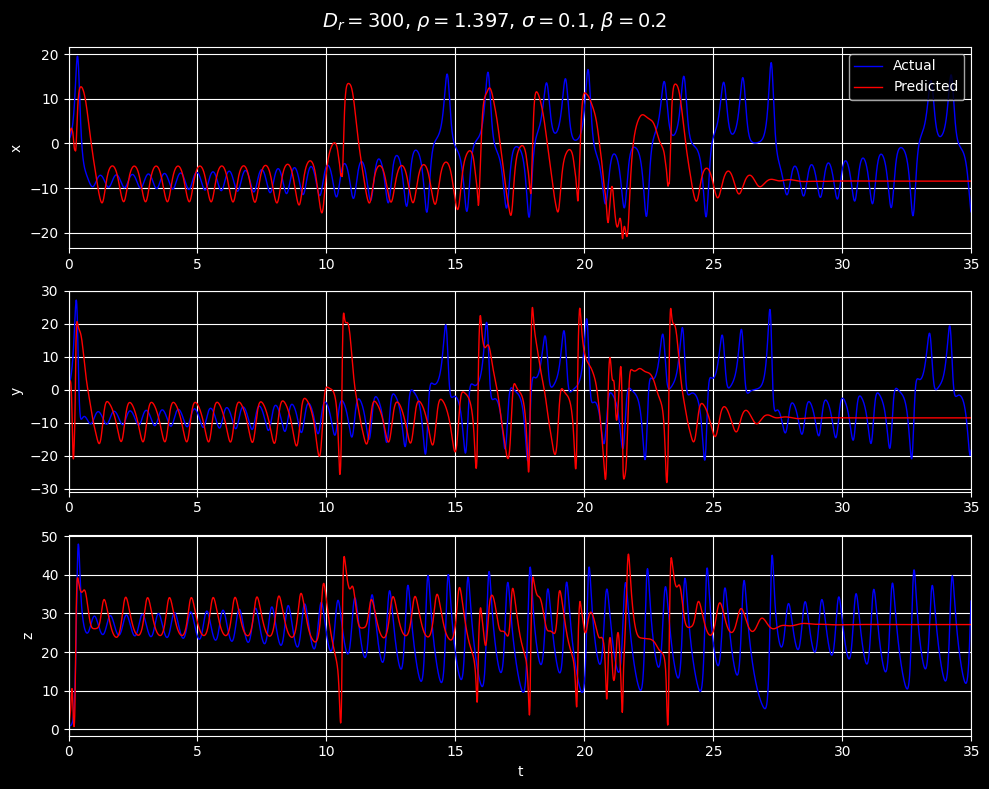

The predicted maximum lyapunov exponent is 0.967530576868659


In [6]:
class ReservoirComputer:
    def __init__(self, N, spectral_radius, input_scaling, leak_rate, seed=42):
        self.N = N 
        self.spectral_radius = spectral_radius
        self.input_scaling = input_scaling
        self.leak_rate = leak_rate
        
        np.random.seed(seed)
        self.W_in = input_scaling * (np.random.rand(N, 3) * 2 - 1)
        self.W = np.random.rand(N, N) - 0.5
        
        eigenvalues, _ = la.eig(self.W)
        self.W *= spectral_radius / np.max(np.abs(eigenvalues))
        
        self.W_out = None 
        
    def train(self, data):
        """Train the reservoir using the provided data."""
        reservoir_state = np.zeros(self.N)
        reservoir_states = []
        
        for u in data:
            reservoir_state = self._update_state(reservoir_state, u)
            reservoir_states.append(np.copy(reservoir_state))
            
        reservoir_states = np.array(reservoir_states)
        
        self.W_out = la.lstsq(reservoir_states, data, cond=None)[0]
        return reservoir_states
    
    def predict(self, initial_state, n_steps):
        """Generate predictions starting from initial_state."""
        predictions = [initial_state] 
        
        r = np.dot(la.pinv(self.W_out.T), initial_state)
        
        for _ in range(n_steps - 1):
            prediction = np.dot(self.W_out.T, r)
            r = self._update_state(r, prediction)
            predictions.append(prediction)
            
        return np.array(predictions)
    
    def _update_state(self, state, input_data):
        """Update reservoir state using leaky integration."""
        return ((1 - self.leak_rate) * state + 
                self.leak_rate * np.tanh(np.dot(self.W, state) + 
                                       np.dot(self.W_in, input_data)))

def find_maxima(data):
    maxima = []
    for i in range(1, len(data)-1):
        if data[i-1] < data[i] and data[i] > data[i+1]:
            maxima.append(data[i])
    return np.array(maxima)

def lorenz(t, state, sigma=10, rho=28, beta=8/3):
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return [dx, dy, dz]

def generate_lorenz_data(T, dt=0.01, initial_state=None):
    if initial_state is None:
        initial_state = [1.0, 1.0, 1.0]
    
    t_span = [0, T]
    t_eval = np.arange(0, T, dt)
    
    sol = solve_ivp(lorenz, t_span, initial_state, t_eval=t_eval)
    return sol.t, sol.y.T

def plot_comparison(t, actual, predicted, title):
    """Plot comparison between actual and predicted trajectories."""
    fig, axes = plt.subplots(3, 1, figsize=(10, 8))
    fig.suptitle(title, fontsize=14)
    
    t_max = 35
    idx_max = np.where(t >= t_max)[0][0] if len(np.where(t >= t_max)[0]) > 0 else len(t)
    
    labels = ['x', 'y', 'z']
    
    for i, (ax, label) in enumerate(zip(axes, labels)):
        ax.plot(t[:idx_max], actual[:idx_max, i], 'b', label='Actual', linewidth=1)
        ax.plot(t[:idx_max], predicted[:idx_max, i], 'r', label='Predicted', linewidth=1)
        ax.set_ylabel(label)
        ax.grid(True)
        if i == 0:
            ax.legend(loc='upper right')
    
    for ax in axes:
        ax.set_xlim(0, t_max)
    
    axes[-1].set_xlabel('t')
    plt.tight_layout()
    plt.show()
def plot_return_map(actual, predicted):
    """Plot return map of z-coordinate maxima."""
    true_maxima = find_maxima(actual[:, 2])
    pred_maxima = find_maxima(predicted[:, 2])
    
    plt.figure(figsize=(6, 6))
    plt.title('Return Map of $z$-coordinate')
    plt.plot(true_maxima[:-1], true_maxima[1:], 'b.', 
             markersize=5, label='Actual', alpha=0.5)
    plt.plot(pred_maxima[:-1], pred_maxima[1:], 'r.', 
             markersize=5, label='Predicted', alpha=0.5)
    plt.xlabel('$z_n$')
    plt.ylabel('$z_{n+1}$')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')

    plt.xlim(min(true_maxima), max(true_maxima))
    plt.ylim(min(true_maxima), max(true_maxima))
    
    plt.show()

def calculate_lyapunov_exponent(trajectory, dt, max_steps=None):
    if max_steps is None:
        max_steps = len(trajectory)
    
    trajectory = trajectory[:max_steps]
    
    
    delay = 20  
    evolve_time = 20  
    
    n_steps = len(trajectory)
    lyap = 0.0
    n_exponents = 0
    
    for i in range(delay, n_steps - evolve_time):
        distances = np.linalg.norm(trajectory[i] - trajectory[delay:i-delay], axis=1)
        if len(distances) == 0:
            continue
        nn_idx = np.argmin(distances) + delay
        
        d0 = np.linalg.norm(trajectory[i] - trajectory[nn_idx])
        if d0 == 0:
            continue
            
        d1 = np.linalg.norm(trajectory[i + evolve_time] - trajectory[nn_idx + evolve_time])
        if d1 == 0:
            continue
            
        lyap += np.log(d1/d0) / (evolve_time * dt)
        n_exponents += 1
    
    if n_exponents == 0:
        return None
    
    return lyap / n_exponents

def lyapunov_calculation(t, predicted, window_size=1000):
    """Plot running estimate of largest Lyapunov exponent for both trajectories."""
    dt = t[1] - t[0]
    
    lyap_estimates_pred = []
    

    step_size = window_size 
    
    max_steps = min(len(t), 20000) 
    
    for i in range(window_size, max_steps, step_size):
        le_pred = calculate_lyapunov_exponent(predicted[:i], dt, max_steps=window_size)
        
        if le_pred is not None:
            lyap_estimates_pred.append(le_pred)
    
    print(f"The predicted maximum lyapunov exponent is {max(lyap_estimates_pred)}")


def main():
    # Parameters
    N = 300
    spectral_radius = 1.397
    input_scaling = 0.1
    leak_rate = 0.2
    dt = 0.01
    
    rc = ReservoirComputer(N, spectral_radius, input_scaling, leak_rate)
    
    # Generate training data
    T_train = 2000
    _, train_data = generate_lorenz_data(T_train)
    rc.train(train_data)
    
    # Generate predictions
    T_pred = 2000
    initial_state = [1.0, 1.0, 1.0]
    t_pred, actual_data = generate_lorenz_data(T_pred, initial_state=initial_state)
    predicted_data = rc.predict(initial_state, len(t_pred))
    
    plot_comparison(t_pred, actual_data, predicted_data, 
                   f'$D_r={N}$, $\\rho={spectral_radius}$, $\\sigma={input_scaling}$, $\\beta={leak_rate}$')
    # plot_return_map(actual_data, predicted_data)
    lyapunov_calculation(t_pred, predicted_data)

if __name__ == "__main__":
    main()